In [76]:
# Imports Modules
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

pd.options.display.max_rows = 150
pd.options.display.max_columns = 150

In [77]:
df = pd.read_csv('kc_house_data.csv') # Import des données

In [78]:
df.shape

(21613, 21)

In [79]:
df.head() # On regarde si les données se sont correctements importées

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [80]:
df.describe() # Description rapide des données

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<AxesSubplot: >

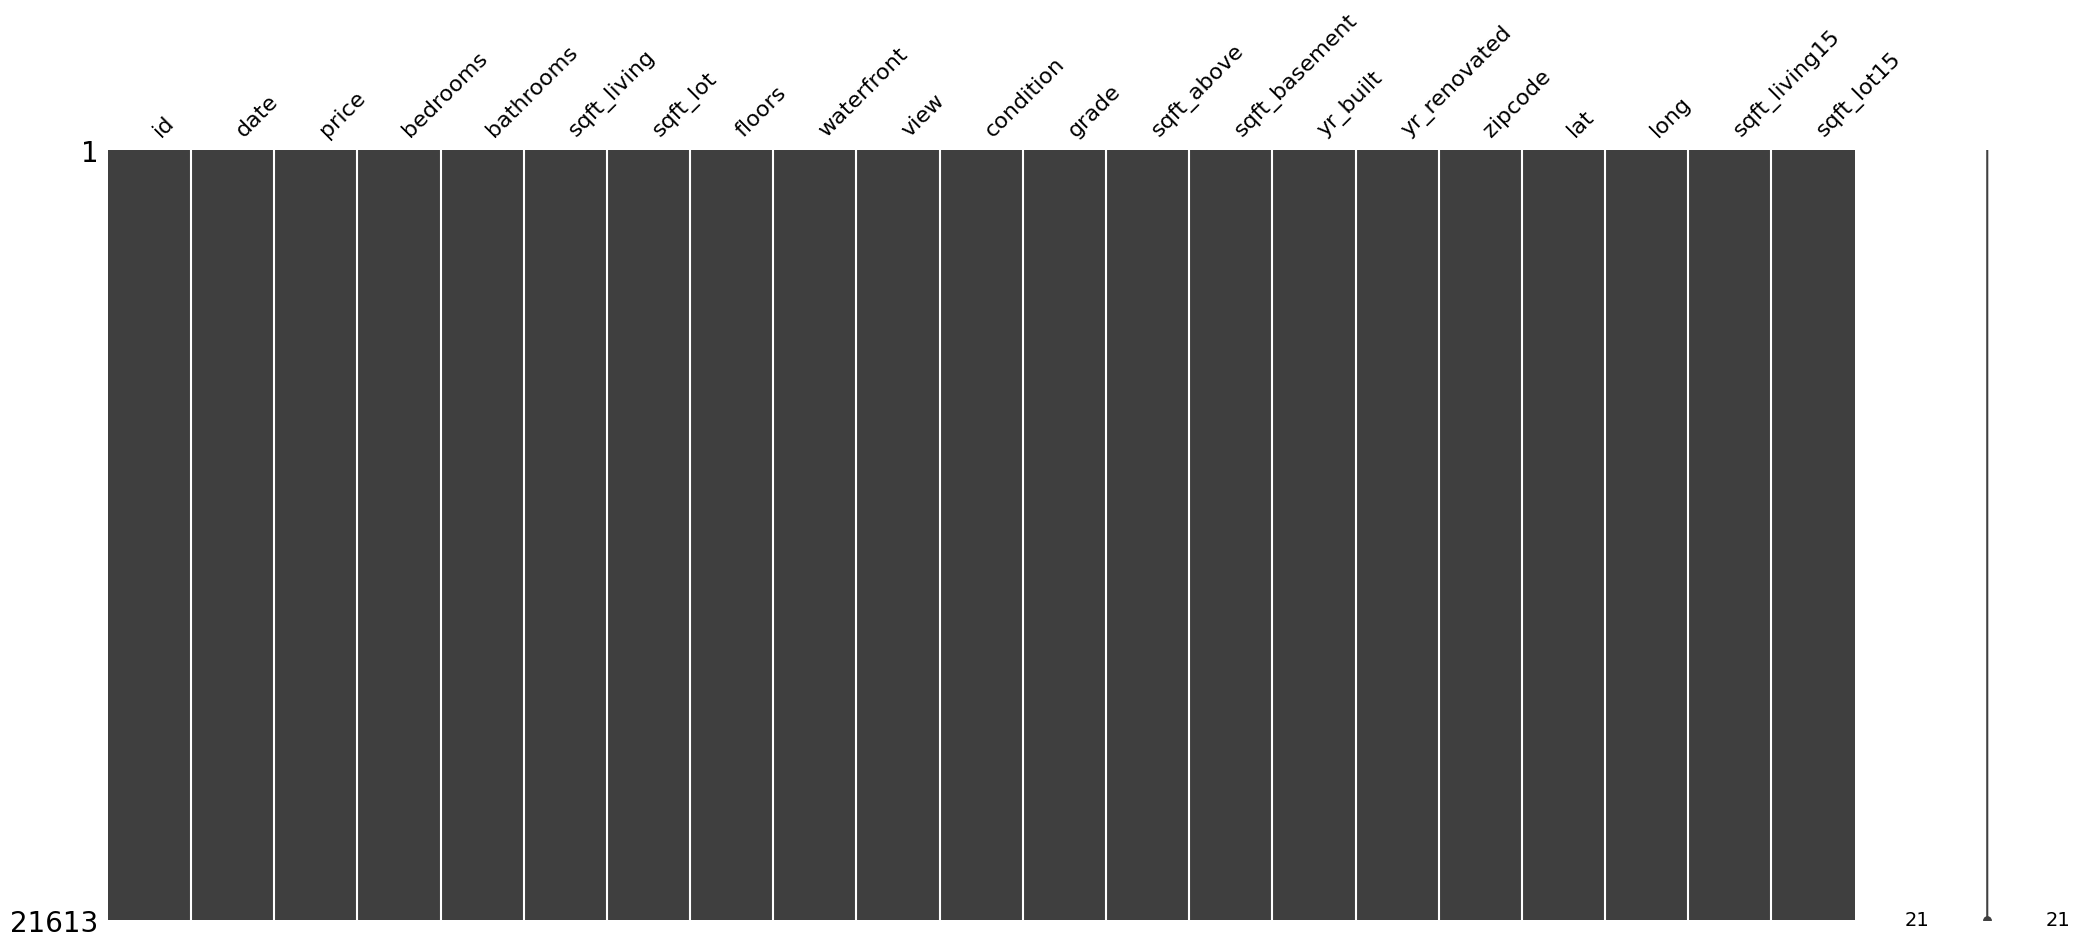

In [81]:
msno.matrix(df) # On regarde si il manque des données

In [82]:
df.drop_duplicates(keep='last') # Suppression des duplications (On garde la dernière si y'a duplication)
df.shape # On regarde si le nombres d'éléments à changé

(21613, 21)

In [83]:
# Convertir sqft en m2
df['sqft_living'] = df['sqft_living'].apply(lambda x: x / 10.764)
df['sqft_lot'] = df['sqft_lot'].apply(lambda x: x / 10.764)
df['sqft_above'] = df['sqft_above'].apply(lambda x: x / 10.764)

In [84]:
# Renomer les colonnes
df = df.rename(columns={"price":"prix", "bathrooms": "salle_eau", "waterfront":"vue_mer", "view":"vue","sqft_above":"m2_hors_sous_sol", "yr_built":"annee_construction", "yr_renovated":"annee_renovation","zipcode":"code_postal",  "bedrooms":"chambres", "sqft_lot": "m2_total", "sqft_living": "m2_habitable", "floors": "étages", "sqft_basement": "m2_cave" })
df.describe()

,id,prix,chambres,salle_eau,m2_habitable,m2_total,étages,vue_mer,vue,condition,grade,m2_hors_sous_sol,m2_cave,annee_construction,annee_renovation,code_postal,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,193.227400,1403.471532,1.494309,0.007542,0.234303,3.409430,7.656873,166.145549,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,85.325241,3848.059412,0.539989,0.086517,0.766318,0.650743,1.175459,76.931529,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,26.941657,48.309179,1.000000,0.000000,0.000000,1.000000,1.000000,26.941657,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,132.571535,468.227425,1.000000,0.000000,0.000000,3.000000,7.000000,110.553698,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,177.443330,707.729469,1.500000,0.000000,0.000000,3.000000,7.000000,144.927536,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,236.900780,992.939428,2.000000,0.000000,0.000000,4.000000,8.000000,205.314010,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,1257.896693,153414.994426,3.500000,1.000000,4.000000,5.000000,13.000000,874.210331,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


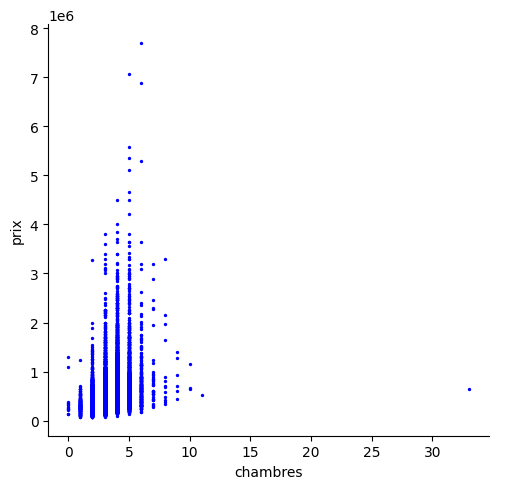

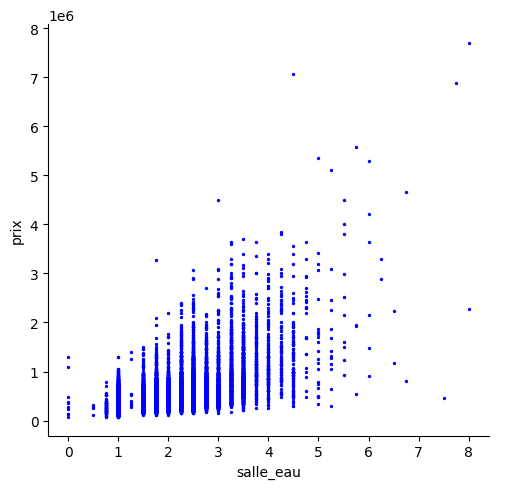

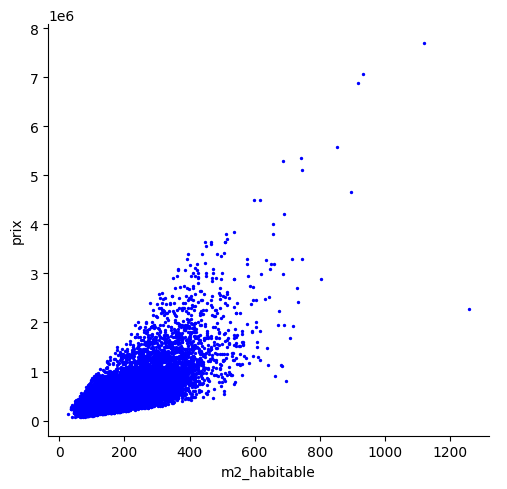

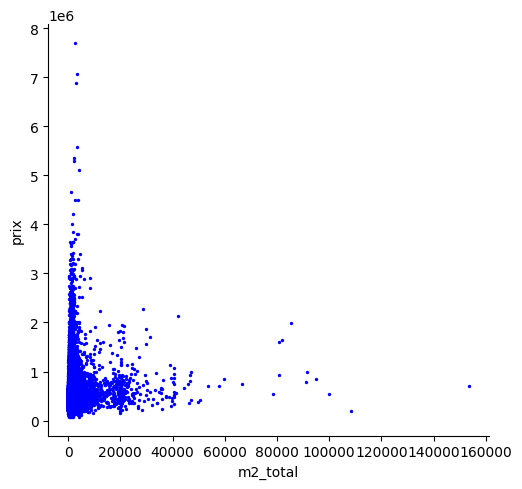

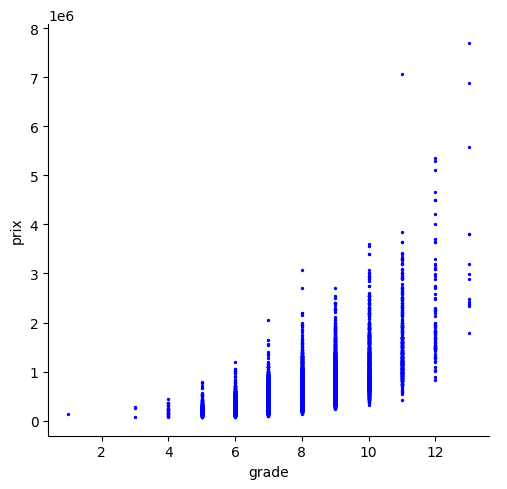

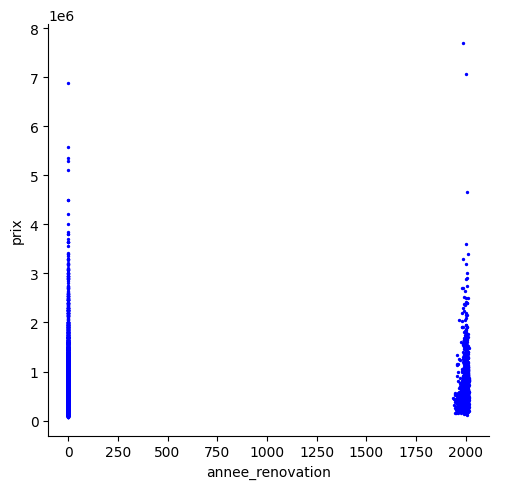

In [85]:
# On génére les graphiques en fonctions des données entrées
data_graph = ['chambres', 'salle_eau', 'm2_habitable', 'm2_total', 'grade', 'annee_renovation']

for data in data_graph:
    sns.FacetGrid(df,height=5).map(plt.scatter,data, "prix", s=2, color='blue').add_legend()

In [86]:
# On remplace l'année de renovation par l'année de construction si elle est égale à 0

liste_renov = []

for annee in range(len(df)):
    if df.iloc[annee]['annee_renovation'] == 0:
        liste_renov.append(df.iloc[annee]['annee_construction'])
    else:
        liste_renov.append(df.iloc[annee]['annee_renovation'])

df['annee_renovation'] = liste_renov

In [87]:
# On génére une heatmap avec la lat et long en fonction du prix

import folium
from folium.plugins import HeatMap

data_m = df[['lat', 'long', 'prix']]
data_m['prix'] = data_m['prix'].apply(lambda x: x/100000)
hmap = folium.Map(location=[data_m['lat'].mean(), data_m['long'].mean()],control_scale = True, zoom_start=13)
HeatMap(data_m).add_to(hmap)
hmap

/var/folders/gv/tfv3kbl11y58yd1f4j17_fqr0000gn/T/ipykernel_935/2546324169.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_m['prix'] = data_m['prix'].apply(lambda x: x/100000)


In [89]:
# On regarde les corrélations entre toutes les colonnes et le prix et on les tries par valeurs
df.corrwith(df['prix']).sort_values(ascending=False)

/var/folders/gv/tfv3kbl11y58yd1f4j17_fqr0000gn/T/ipykernel_935/2828612599.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df['prix']).sort_values(ascending=False)


prix                  1.000000
m2_habitable          0.702035
grade                 0.667434
m2_hors_sous_sol      0.605567
sqft_living15         0.585379
salle_eau             0.525138
vue                   0.397293
m2_cave               0.323816
chambres              0.308350
lat                   0.307003
vue_mer               0.266369
étages                0.256794
annee_renovation      0.105755
m2_total              0.089661
sqft_lot15            0.082447
annee_construction    0.054012
condition             0.036362
long                  0.021626
id                   -0.016762
code_postal          -0.053203
dtype: float64

/var/folders/gv/tfv3kbl11y58yd1f4j17_fqr0000gn/T/ipykernel_935/58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

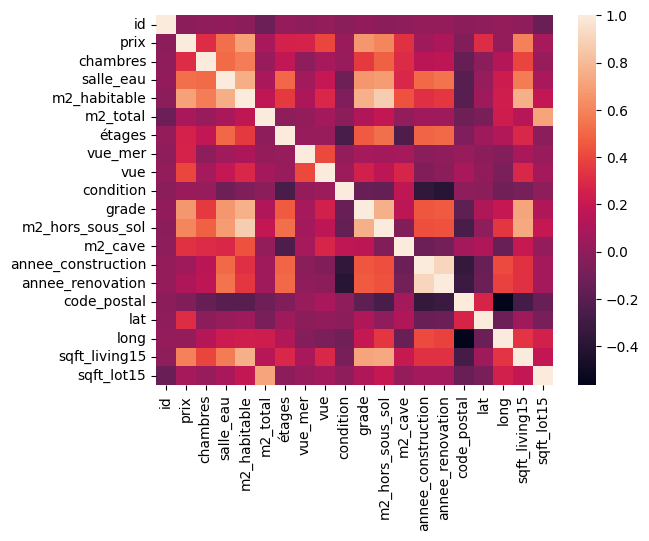

In [90]:
# Une génére une heatmap en fonction des correlations
sns.heatmap(df.corr())

In [91]:
# On génére une colonne par CP
df = df.join(pd.get_dummies(df['code_postal']))

In [92]:
# On regarde les corrélations entre toutes les colonnes et le prix et on les tries par valeurs une fois les colonnes cp ajoutées
df.corrwith(df['prix']).sort_values(ascending=False)

/var/folders/gv/tfv3kbl11y58yd1f4j17_fqr0000gn/T/ipykernel_935/2828612599.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df['prix']).sort_values(ascending=False)


prix                  1.000000
m2_habitable          0.702035
grade                 0.667434
m2_hors_sous_sol      0.605567
sqft_living15         0.585379
salle_eau             0.525138
vue                   0.397293
m2_cave               0.323816
chambres              0.308350
lat                   0.307003
98004                 0.271131
vue_mer               0.266369
étages                0.256794
98039                 0.212558
98040                 0.204873
98112                 0.169842
98006                 0.133695
annee_renovation      0.105755
98033                 0.102556
98105                 0.090974
m2_total              0.089661
98075                 0.088676
98199                 0.083659
sqft_lot15            0.082447
98119                 0.078085
98102                 0.068738
98109                 0.065846
98005                 0.065114
98074                 0.057207
annee_construction    0.054012
98053                 0.051974
98052                 0.047306
98177   

In [93]:
df.describe()

,id,prix,chambres,salle_eau,m2_habitable,m2_total,étages,vue_mer,vue,condition,grade,m2_hors_sous_sol,m2_cave,annee_construction,annee_renovation,code_postal,lat,long,sqft_living15,sqft_lot15,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,193.227400,1403.471532,1.494309,0.007542,0.234303,3.409430,7.656873,166.145549,291.509045,1971.005136,1973.386018,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,0.016749,0.009207,0.012955,0.014667,0.007773,0.023042,0.006524,0.013094,0.004627,0.009022,0.005737,0.008791,0.010827,0.023088,0.003748,0.019063,0.013094,0.014852,0.011845,0.012678,0.005784,0.019988,0.025216,0.027298,0.002313,0.013048,0.025355,0.010225,0.026558,0.018739,0.012400,0.018785,0.021052,0.021654,0.014343,0.005460,0.012631,0.020404,0.016610,0.009161,0.016240,0.004858,0.027854,0.010595,0.015500,0.012307,0.008606,0.005043,0.012446,0.026975,0.015269,0.025586,0.023504,0.008513,0.013418,0.018970,0.016379,0.022857,0.012169,0.015870,0.013325,0.002637,0.020636,0.011752,0.012446,0.011798,0.012122,0.006293,0.012955,0.014667
std,2.876566e+09,3.671272e+05,0.930062,0.770163,85.325241,3848.059412,0.539989,0.086517,0.766318,0.650743,1.175459,76.931529,442.575043,29.373411,28.806854,53.505026,0.138564,0.140828,685.391304,27304.179631,0.128333,0.095515,0.113084,0.120219,0.087824,0.150039,0.080508,0.113680,0.067865,0.094559,0.075529,0.093349,0.103490,0.150186,0.061105,0.136748,0.113680,0.120964,0.108189,0.111881,0.075831,0.139962,0.156785,0.162955,0.048043,0.113482,0.157205,0.100604,0.160792,0.135604,0.110665,0.135768,0.143562,0.145553,0.118904,0.073689,0.111680,0.141382,0.127809,0.095277,0.126401,0.069533,0.164557,0.102390,0.123533,0.110257,0.092370,0.070838,0.110869,0.162013,0.122622,0.157902,0.151502,0.091877,0.115058,0.136422,0.126931,0.149450,0.109641,0.124976,0.114666,0.051288,0.142165,0.107771,0.110869,0.107981,0.109435,0.079077,0.113084,0.120219
min,1.000102e+06,7.500000e+04,0.000000,0.000000,26.941657,48.309179,1.000000,0.000000,0.000000,1.000000,1.000000,26.941657,0.000000,1900.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [94]:
df.to_csv('data.csv', index=False) # On exporte notre dataSet modifié